In [436]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import warnings
import itertools
import seaborn as sns
import numpy as np
from collections import defaultdict
from statistics import mean
from pandas.plotting import scatter_matrix
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [437]:
df_immigrant_pop = pd.read_excel('Unauthorized_Immigrant_population_Estimates.xlsx', sheet_name= "1989-2019")
df_border_budget = pd.read_csv('UPDATED U.S. Border patrol budget - Sheet1.csv')
df_mx_co2 = pd.read_csv("mexico-carbon-co2-emissions.csv", skiprows=14, sep = ',')
df_mx_crime = pd.read_csv('mexico-crime-rate-statistics.csv', sep = ',', skiprows = 16)
df_mx_greenhouse = pd.read_csv('mexico-ghg-greenhouse-gas-emissions.csv', skiprows=15, sep = ',')
df_mx_inflation = pd.read_csv('mexico-inflation-rate-cpi.csv', skiprows=16, sep = ',')
df_mx_murder = pd.read_csv('mexico-murder-homicide-rate.csv', skiprows=16, sep=',')
df_mx_poverty = pd.read_csv('mexico-poverty-rate.csv', sep = ',', skiprows = 16)
df_un = pd.read_excel('undesa_pd_2020_ims_stock_by_sex_destination_and_origin (1).xlsx', sheet_name='Table 1_2')
df_us_gdp = pd.read_csv('united-states-gdp-growth-rate.csv', sep = ',', skiprows = 16, dtype=str)
df_mx_gdp = pd.read_excel('Mexico GDP.xlsx')

### Cleaning and Feature Engineering of the df_immigrant_pop dataset

In [308]:
#Load dataset. Note, this dataset was previously cleaned and uploaded via a excel file. The 'UNAUTHORIZED_POP_ENTERED_US' column will serve as our y predictor.
df_immigrant_pop

,YEAR,UNAUTHORIZED_POP_ENTERED_US
0,1989,7.251934e+05
1,1990,8.158760e+05
2,1991,6.486020e+05
3,1992,5.586010e+05
4,1993,5.566050e+05
5,1994,7.000300e+05
6,1995,8.215330e+05
7,1996,7.557840e+05
8,1997,7.587030e+05
9,1998,9.535910e+05


In [309]:
##To remove scientific notation
df_immigrant_pop.round().head()

,YEAR,UNAUTHORIZED_POP_ENTERED_US
0,1989,725193.0
1,1990,815876.0
2,1991,648602.0
3,1992,558601.0
4,1993,556605.0


In [310]:
#Code to set new index.  This code will be the final step upon cleaning the data.
new_index = np.array(range(1,32))
new_index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

In [311]:
#set new index to prepare for merge. Final cleaned df ready for merge.
final_df_im_pop = df_immigrant_pop.set_index(keys=new_index)
final_df_im_pop

,YEAR,UNAUTHORIZED_POP_ENTERED_US
1,1989,7.251934e+05
2,1990,8.158760e+05
3,1991,6.486020e+05
4,1992,5.586010e+05
5,1993,5.566050e+05
6,1994,7.000300e+05
7,1995,8.215330e+05
8,1996,7.557840e+05
9,1997,7.587030e+05
10,1998,9.535910e+05


### Cleaning and Feature Engineering of the df_border_budget dataset

In [312]:
#load dataset
df_border_budget

,Date,Millions
0,1990,263
1,1991,299
2,1992,326
3,1993,363
4,1994,400
5,1995,452
6,1996,568
7,1997,717
8,1998,877
9,1999,917


In [313]:
df_border_budget.describe()

,Date,Millions
count,32.000000,32.00000
mean,2005.500000,1994.62500
std,9.380832,1424.09672
min,1990.000000,263.00000
25%,1997.750000,837.00000
50%,2005.500000,1520.00000
75%,2013.250000,3483.00000
max,2021.000000,4869.00000


In [314]:
df_border_budget.columns

Index(['Date', 'Millions'], dtype='object')

In [315]:
#insert new row using mean for a value.
insert_row = pd.DataFrame({'Date': [1989], 'Millions': [2000]})

In [316]:
df_border_budget1 = df_border_budget.append(insert_row)
df_border_budget1.tail()

,Date,Millions
28,2018,3801
29,2019,4286
30,2020,4458
31,2021,4869
0,1989,2000


In [317]:
#Put all dates in order
df_border_budget2 = df_border_budget1.sort_values('Date')
df_border_budget2

,Date,Millions
0,1989,2000
0,1990,263
1,1991,299
2,1992,326
3,1993,363
4,1994,400
5,1995,452
6,1996,568
7,1997,717
8,1998,877


In [318]:
#we only need data through 2019
df_border_budget3 = df_border_budget2.drop(index=[30,31])
df_border_budget3.tail()

,Date,Millions
25,2015,3467
26,2016,3635
27,2017,3798
28,2018,3801
29,2019,4286


In [319]:
#Rename columns.
df_border_budget3.columns = ['Date', "us_border_spending_in_millions"]

In [320]:
#Final cleaned df ready for merge
final_border_spending = df_border_budget3.set_index(keys=new_index)
final_border_spending

,Date,us_border_spending_in_millions
1,1989,2000
2,1990,263
3,1991,299
4,1992,326
5,1993,363
6,1994,400
7,1995,452
8,1996,568
9,1997,717
10,1998,877


### Cleaning and Feature Engineering of the df_mx_co2 dataset

In [321]:
#data from 1960 -2000
df_mx_co2.head()

,Unnamed: 0,Total,Per Capita,
0,date,Kilotons of Co2,Metric Tons Per Capita,
1,1960-12-31,63116.404,1.671,NaN
2,1961-12-31,65305.603,1.676,NaN
3,1962-12-31,63809.467,1.5875,NaN
4,1963-12-31,66361.699,1.6005,NaN


In [322]:
#get rid of empty columns first.  It will be less confusing to look at as you work.
df_mx_co2.columns

Index(['Unnamed: 0', ' Total', ' Per Capita', ' '], dtype='object')

In [323]:
#I always rename the dataset when i make a major transformation.
df_mx_co2_1 = df_mx_co2[['Unnamed: 0', ' Total', ' Per Capita']]
df_mx_co2_1.head()

,Unnamed: 0,Total,Per Capita
0,date,Kilotons of Co2,Metric Tons Per Capita
1,1960-12-31,63116.404,1.671
2,1961-12-31,65305.603,1.676
3,1962-12-31,63809.467,1.5875
4,1963-12-31,66361.699,1.6005


In [324]:
#NOW rename columns to better names.
df_mx_co2_1.columns = ['Date', 'MEXICO_TOTAL_KILOTONS_Co2', 'MEXICO_MT_Co2_PER_CAPITA']

In [325]:
df_mx_co2_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       58 non-null     object
 1   MEXICO_TOTAL_KILOTONS_Co2  58 non-null     object
 2   MEXICO_MT_Co2_PER_CAPITA   58 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [326]:
#drop 30 rows so we can start at year 1989.  set inplace=False which will automatically reset the index
df_mx_co2_2 = df_mx_co2_1.drop(df_mx_co2_1.index[:30], inplace = False)
df_mx_co2_2.head()

,Date,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA
30,1989-12-31,361877.895,4.3934
31,1990-12-31,318427.612,3.7934
32,1991-12-31,331958.842,3.882
33,1992-12-31,334698.091,3.8438
34,1993-12-31,339468.858,3.8304


In [327]:
df_mx_co2_2['Date'] = pd.to_datetime(df_mx_co2_2['Date']).dt.year
df_mx_co2_2.head()

,Date,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA
30,1989,361877.895,4.3934
31,1990,318427.612,3.7934
32,1991,331958.842,3.882
33,1992,334698.091,3.8438
34,1993,339468.858,3.8304


In [328]:
#always do a .info on a df after you have the basic df.  You can begin to analyze the data.
df_mx_co2_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 30 to 57
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       28 non-null     int64 
 1   MEXICO_TOTAL_KILOTONS_Co2  28 non-null     object
 2   MEXICO_MT_Co2_PER_CAPITA   28 non-null     object
dtypes: int64(1), object(2)
memory usage: 896.0+ bytes


In [329]:
df_mx_co2_3=df_mx_co2_2.astype(float)

In [330]:
#ran into an issue with further cleaning so I converted all data to floats then reran .describe
df_mx_co2_3.describe()

,Date,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA
count,28.000000,28.000000,28.000000
mean,2002.500000,419919.694857,4.077082
std,8.225975,62449.637127,0.225679
min,1989.000000,318427.612000,3.630900
25%,1995.750000,359603.438250,3.911825
50%,2002.500000,427299.008500,4.060100
75%,2009.250000,480764.785250,4.232050
max,2016.000000,496324.783000,4.455700


In [331]:
#the best way to make new rows at the end of a df kis to make a new df, and then concat
df2_bonus = pd.DataFrame({'Date': [2017, 2018, 2019], 
                          'MEXICO_TOTAL_KILOTONS_Co2': [419920, 419920, 419920], 
                          'MEXICO_MT_Co2_PER_CAPITA': [4.07, 4.07, 4.07]})
df2_bonus

,Date,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA
0,2017,419920,4.07
1,2018,419920,4.07
2,2019,419920,4.07


In [332]:
#Attach dfs to each other.
df_mx_co2_4= pd.concat([df_mx_co2_3, df2_bonus])
df_mx_co2_4

,Date,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA
30,1989.0,361877.895,4.3934
31,1990.0,318427.612,3.7934
32,1991.0,331958.842,3.8820
33,1992.0,334698.091,3.8438
34,1993.0,339468.858,3.8304
35,1994.0,352780.068,3.9130
36,1995.0,332816.920,3.6309
37,1996.0,346417.823,3.7190
38,1997.0,369769.279,3.9083
39,1998.0,389087.035,4.0506


In [333]:
#now set a new index so i can merge
df_mex_co2_final = df_mx_co2_4.set_index(keys=new_index)
df_mex_co2_final

,Date,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA
1,1989.0,361877.895,4.3934
2,1990.0,318427.612,3.7934
3,1991.0,331958.842,3.8820
4,1992.0,334698.091,3.8438
5,1993.0,339468.858,3.8304
6,1994.0,352780.068,3.9130
7,1995.0,332816.920,3.6309
8,1996.0,346417.823,3.7190
9,1997.0,369769.279,3.9083
10,1998.0,389087.035,4.0506


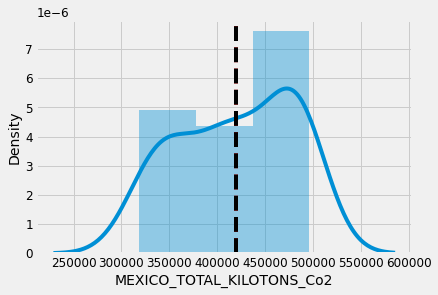

In [334]:
sns.distplot(df_mex_co2_final.MEXICO_TOTAL_KILOTONS_Co2)
plt.axvline(df_mex_co2_final['MEXICO_TOTAL_KILOTONS_Co2'].mean(), color='r', linestyle='--')
plt.axvline(df_mex_co2_final['MEXICO_TOTAL_KILOTONS_Co2'].median(), color='black', linestyle='--')

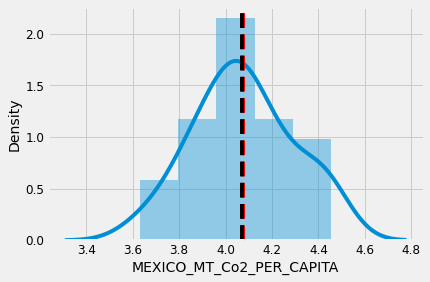

In [335]:
#this column is a pefect normal distribution1
sns.distplot(df_mex_co2_final.MEXICO_MT_Co2_PER_CAPITA)
plt.axvline(df_mex_co2_final['MEXICO_MT_Co2_PER_CAPITA'].mean(), color='r', linestyle='--')
plt.axvline(df_mex_co2_final['MEXICO_MT_Co2_PER_CAPITA'].median(), color='black', linestyle='--')

numpy.ndarray

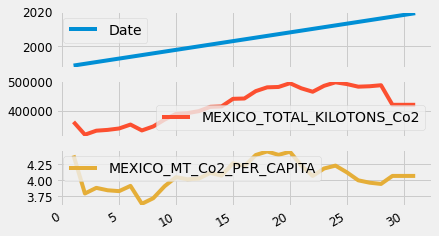

In [336]:
axes = df_mex_co2_final.plot.line(subplots=True)
type(axes)

### Cleaning and Feature Engineering of the df_mx_crime dataset

In [337]:
#1990 - 2018
#Look at the data
df_mx_crime.head(5)

,date,Per 100K Population,Annual % Change,
0,1990-12-31,17.2653,NaN,NaN
1,1991-12-31,17.6910,2.47,NaN
2,1992-12-31,19.0571,7.72,NaN
3,1993-12-31,18.0986,-5.03,NaN
4,1994-12-31,17.5684,-2.93,NaN


In [338]:
#look at the dtypes
df_mx_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  29 non-null     object 
 1    Per 100K Population  29 non-null     float64
 2    Annual % Change      28 non-null     float64
 3                         0 non-null      float64
dtypes: float64(3), object(1)
memory usage: 1.0+ KB


In [339]:
#Change date column to string to amend the date
df_mx_crime['date'] = df_mx_crime.date.astype('string')

In [340]:
#Check the date type
df_mx_crime.dtypes

date                     string
 Per 100K Population    float64
 Annual % Change        float64
                        float64
dtype: object

In [341]:
#Look at the columns
df_mx_crime.columns

Index(['date', ' Per 100K Population', ' Annual % Change', ' '], dtype='object')

In [342]:
#Drop the empty column
df_mx_crime = df_mx_crime[['date', ' Per 100K Population', ' Annual % Change']]
df_mx_crime

,date,Per 100K Population,Annual % Change
0,1990-12-31,17.2653,NaN
1,1991-12-31,17.6910,2.47
2,1992-12-31,19.0571,7.72
3,1993-12-31,18.0986,-5.03
4,1994-12-31,17.5684,-2.93
5,1995-12-31,17.0319,-3.05
6,1996-12-31,15.5722,-8.57
7,1997-12-31,14.3239,-8.02
8,1998-12-31,14.2167,-0.75
9,1999-12-31,12.5650,-11.62


In [343]:
#Look at simple stats of the semi-cleaned dataframe to get mean values to replace null values.
df_mx_crime.describe()

,Per 100K Population,Annual % Change
count,29.000000,28.000000
mean,16.089083,3.081071
std,5.395521,17.086791
min,8.122200,-16.420000
25%,10.856400,-8.157500
50%,17.031900,-2.145000
75%,19.057100,5.567500
max,29.071100,55.610000


In [344]:
#create a new data frame to add an entry of 1989 and concatenate with the previous df.
new_row = pd.DataFrame({'date':'1989', ' Per 100K Population':16, ' Annual % Change':3},
                                                            index =[0])

df_mx_crime = pd.concat([new_row, df_mx_crime]).reset_index(drop = True)
df_mx_crime.head(5)

,date,Per 100K Population,Annual % Change
0,1989,16.0000,3.00
1,1990-12-31,17.2653,NaN
2,1991-12-31,17.6910,2.47
3,1992-12-31,19.0571,7.72
4,1993-12-31,18.0986,-5.03


In [345]:
#Add a row to the end of the dataframe with the mean
df_mx_crime.loc[-1] = ['2019', 16, 3]

In [346]:
#Fill the null values of Annual % Change column with mean
df_mx_crime[' Annual % Change'] = df_mx_crime[' Annual % Change'].fillna(3)

In [347]:
#change column names to better identifiers in preparation for the merge to master df.
df_mx_crime.columns = ['Date', 'Mx_crimes_per_100k', 'mx_annual_per_change_crimes']

In [348]:
#remove date column as this column does not match format, reset index
df_mx_crime = df_mx_crime[['Mx_crimes_per_100k', 'mx_annual_per_change_crimes']]
df_mx_crime1 = df_mx_crime.set_index(keys = new_index)
df_mx_crime1.head()

,Mx_crimes_per_100k,mx_annual_per_change_crimes
1,16.0000,3.00
2,17.2653,3.00
3,17.6910,2.47
4,19.0571,7.72
5,18.0986,-5.03


### Cleaning and Feature Engineering of the df_mx_greenhouse dataset

In [349]:
#1970-2012
df_mx_greenhouse

,Unnamed: 0,,.1,.2
0,date,kt of CO2 equivalent,Annual % Change,
1,1970-12-31,210547.8556,NaN,NaN
2,1971-12-31,215289.415,2.25,NaN
3,1972-12-31,229445.067,6.58,NaN
4,1973-12-31,241668.377,5.33,NaN
5,1974-12-31,266400.717,10.23,NaN
6,1975-12-31,280289.646,5.21,NaN
7,1976-12-31,292167.457,4.24,NaN
8,1977-12-31,304657.545,4.27,NaN
9,1978-12-31,332679.42,9.2,NaN


In [350]:
df_mx_greenhouse.columns = ['date', 'kt of CO2 equivalent',	'Annual % Change', '']

In [351]:
df_mx_greenhouse1 = df_mx_greenhouse[['date', 'kt of CO2 equivalent', 'Annual % Change']]
df_mx_greenhouse1

,date,kt of CO2 equivalent,Annual % Change
0,date,kt of CO2 equivalent,Annual % Change
1,1970-12-31,210547.8556,NaN
2,1971-12-31,215289.415,2.25
3,1972-12-31,229445.067,6.58
4,1973-12-31,241668.377,5.33
5,1974-12-31,266400.717,10.23
6,1975-12-31,280289.646,5.21
7,1976-12-31,292167.457,4.24
8,1977-12-31,304657.545,4.27
9,1978-12-31,332679.42,9.2


In [352]:
ght = list(range(0,20))
df_mx_greenhouse2 = df_mx_greenhouse1.drop(index =ght)
df_mx_greenhouse2

,date,kt of CO2 equivalent,Annual % Change
20,1989-12-31,473325.8,2.41
21,1990-12-31,494151.02,4.4
22,1991-12-31,505174.028,2.23
23,1992-12-31,494645.64,-2.08
24,1993-12-31,502121.057,1.51
25,1994-12-31,520225.772,3.61
26,1995-12-31,515961.212,-0.82
27,1996-12-31,532804.427,3.26
28,1997-12-31,539136.339,1.19
29,1998-12-31,692323.18,28.41


In [353]:
df_mx_greenhouse2['date'] = pd.to_datetime(df_mx_greenhouse2['date']).dt.year

In [354]:
df_mx_greenhouse2.head()

,date,kt of CO2 equivalent,Annual % Change
20,1989,473325.8,2.41
21,1990,494151.02,4.4
22,1991,505174.028,2.23
23,1992,494645.64,-2.08
24,1993,502121.057,1.51


In [355]:
#fill in missing value with mean of last 5 years
a = df_mx_greenhouse2.loc[39:44,['kt of CO2 equivalent']]
b = df_mx_greenhouse2.loc[39:44,['Annual % Change']]
c= np.array([a['kt of CO2 equivalent']]).astype(np.float)
d=np.array([b['Annual % Change']]).astype(np.float)
df_mx_greenhouse2.loc[45]=[2013, np.mean(c), np.mean(d)]
df_mx_greenhouse2.tail()

,date,kt of CO2 equivalent,Annual % Change
40,2009.0,648860.0791,0.73
41,2010.0,643375.4336,-0.85
42,2011.0,652861.2915,1.47
43,2012.0,663424.9544,1.62
45,2013.0,650538,0.528


In [356]:
a = df_mx_greenhouse2.loc[40:45,['kt of CO2 equivalent']]
b = df_mx_greenhouse2.loc[40:45,['Annual % Change']]
c= np.array([a['kt of CO2 equivalent']]).astype(np.float)
d=np.array([b['Annual % Change']]).astype(np.float)
df_mx_greenhouse2.loc[46]=[2014, np.mean(c), np.mean(d)]
df_mx_greenhouse2.tail()

,date,kt of CO2 equivalent,Annual % Change
41,2010.0,643375.4336,-0.85
42,2011.0,652861.2915,1.47
43,2012.0,663424.9544,1.62
45,2013.0,650538,0.528
46,2014.0,651812,0.6996


In [357]:
a = df_mx_greenhouse2.loc[41:46,['kt of CO2 equivalent']]
b = df_mx_greenhouse2.loc[41:46,['Annual % Change']]
c= np.array([a['kt of CO2 equivalent']]).astype(np.float)
d=np.array([b['Annual % Change']]).astype(np.float)
df_mx_greenhouse2.loc[47]=[2015, np.mean(c), np.mean(d)]
df_mx_greenhouse2.tail()

,date,kt of CO2 equivalent,Annual % Change
42,2011.0,652861.2915,1.47
43,2012.0,663424.9544,1.62
45,2013.0,650538,0.528
46,2014.0,651812,0.6996
47,2015.0,652402,0.69352


In [358]:
a = df_mx_greenhouse2.loc[42:47,['kt of CO2 equivalent']]
b = df_mx_greenhouse2.loc[42:47,['Annual % Change']]
c= np.array([a['kt of CO2 equivalent']]).astype(np.float)
d=np.array([b['Annual % Change']]).astype(np.float)
df_mx_greenhouse2.loc[48]=[2016, np.mean(c), np.mean(d)]
df_mx_greenhouse2.tail()

,date,kt of CO2 equivalent,Annual % Change
43,2012.0,663424.9544,1.62
45,2013.0,650538,0.528
46,2014.0,651812,0.6996
47,2015.0,652402,0.69352
48,2016.0,654208,1.00222


In [359]:
a = df_mx_greenhouse2.loc[43:48,['kt of CO2 equivalent']]
b = df_mx_greenhouse2.loc[43:48,['Annual % Change']]
c= np.array([a['kt of CO2 equivalent']]).astype(np.float)
d=np.array([b['Annual % Change']]).astype(np.float)
df_mx_greenhouse2.loc[49]=[2017, np.mean(c), np.mean(d)]
df_mx_greenhouse2.tail()

,date,kt of CO2 equivalent,Annual % Change
45,2013.0,650538,0.528
46,2014.0,651812,0.6996
47,2015.0,652402,0.69352
48,2016.0,654208,1.00222
49,2017.0,654477,0.908669


In [360]:
a = df_mx_greenhouse2.loc[44:49,['kt of CO2 equivalent']]
b = df_mx_greenhouse2.loc[44:49,['Annual % Change']]
c= np.array([a['kt of CO2 equivalent']]).astype(np.float)
d=np.array([b['Annual % Change']]).astype(np.float)
df_mx_greenhouse2.loc[50]=[2018, np.mean(c), np.mean(d)]
df_mx_greenhouse2.tail()

,date,kt of CO2 equivalent,Annual % Change
46,2014.0,651812,0.6996
47,2015.0,652402,0.69352
48,2016.0,654208,1.00222
49,2017.0,654477,0.908669
50,2018.0,652687,0.766403


In [361]:
a = df_mx_greenhouse2.loc[45:50,['kt of CO2 equivalent']]
b = df_mx_greenhouse2.loc[45:50,['Annual % Change']]
c= np.array([a['kt of CO2 equivalent']]).astype(np.float)
d=np.array([b['Annual % Change']]).astype(np.float)
df_mx_greenhouse2.loc[51]=[2019, np.mean(c), np.mean(d)]
df_mx_greenhouse2.tail()

,date,kt of CO2 equivalent,Annual % Change
47,2015.0,652402,0.69352
48,2016.0,654208,1.00222
49,2017.0,654477,0.908669
50,2018.0,652687,0.766403
51,2019.0,652687,0.766403


In [362]:
final_greenhouse_df=df_mx_greenhouse2.set_index(keys=new_index)
final_greenhouse_df

,date,kt of CO2 equivalent,Annual % Change
1,1989.0,473325.8,2.41
2,1990.0,494151.02,4.4
3,1991.0,505174.028,2.23
4,1992.0,494645.64,-2.08
5,1993.0,502121.057,1.51
6,1994.0,520225.772,3.61
7,1995.0,515961.212,-0.82
8,1996.0,532804.427,3.26
9,1997.0,539136.339,1.19
10,1998.0,692323.18,28.41


### Cleaning and Feature Engineering of the df_mx_inflation dataset

In [363]:
df_mx_inflation

,date,Inflation Rate (%),Annual Change,
0,1960-12-31,4.9275,NaN,NaN
1,1961-12-31,1.6088,-3.32,NaN
2,1962-12-31,1.1990,-0.41,NaN
3,1963-12-31,0.5941,-0.60,NaN
4,1964-12-31,2.3379,1.74,NaN
5,1965-12-31,3.5680,1.23,NaN
6,1966-12-31,4.2158,0.65,NaN
7,1967-12-31,3.0169,-1.20,NaN
8,1968-12-31,2.3340,-0.68,NaN
9,1969-12-31,3.3670,1.03,NaN


In [364]:
df_mx_inflation.columns

Index(['date', ' Inflation Rate (%)', ' Annual Change', ' '], dtype='object')

In [365]:
#renaming the dataset 
df_mx_inflation1 = df_mx_inflation[['date', ' Inflation Rate (%)', ' Annual Change',]]
df_mx_inflation1.head()

,date,Inflation Rate (%),Annual Change
0,1960-12-31,4.9275,NaN
1,1961-12-31,1.6088,-3.32
2,1962-12-31,1.1990,-0.41
3,1963-12-31,0.5941,-0.60
4,1964-12-31,2.3379,1.74


In [366]:
#RENAME columns
df_mx_inflation1.columns = ['DATE', 'MEXICO_INFLATION_RATE_PERCENTAGE', 'MEXICO_INFLATION_ANNUAL_CHANGE']
df_mx_inflation1.head()

,DATE,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE
0,1960-12-31,4.9275,NaN
1,1961-12-31,1.6088,-3.32
2,1962-12-31,1.1990,-0.41
3,1963-12-31,0.5941,-0.60
4,1964-12-31,2.3379,1.74


In [367]:
df_mx_inflation1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   DATE                              60 non-null     object 
 1   MEXICO_INFLATION_RATE_PERCENTAGE  60 non-null     float64
 2   MEXICO_INFLATION_ANNUAL_CHANGE    59 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [368]:
#drop first 29 rows to start at year 1989.  set inplace=False to automatically reset the index
df_mx_inflation2 = df_mx_inflation1.drop(df_mx_inflation.index[:29], inplace = False)
df_mx_inflation2.head()

,DATE,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE
29,1989-12-31,20.0079,-94.15
30,1990-12-31,26.6517,6.64
31,1991-12-31,22.6624,-3.99
32,1992-12-31,15.5079,-7.15
33,1993-12-31,9.7515,-5.76


In [369]:
#Change date to datetime from object and select only the year
df_mx_inflation2['DATE'] = pd.to_datetime(df_mx_inflation2['DATE']).dt.year
df_mx_inflation2.head()

,DATE,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE
29,1989,20.0079,-94.15
30,1990,26.6517,6.64
31,1991,22.6624,-3.99
32,1992,15.5079,-7.15
33,1993,9.7515,-5.76


In [370]:
#.describe on a df after you have the basic df.  You can begin to analyze the data.
df_mx_inflation2.describe()

,DATE,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE
count,31.000000,31.000000,31.000000
mean,2004.000000,10.187626,-3.565484
std,9.092121,9.336670,17.982846
min,1989.000000,2.720600,-94.150000
25%,1996.500000,4.003350,-2.955000
50%,2004.000000,5.125000,-0.700000
75%,2011.500000,15.718150,0.190000
max,2019.000000,34.999300,28.030000


In [371]:
df_mex_inflation = df_mx_inflation2.set_index(keys=new_index)
df_mex_inflation

,DATE,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE
1,1989,20.0079,-94.15
2,1990,26.6517,6.64
3,1991,22.6624,-3.99
4,1992,15.5079,-7.15
5,1993,9.7515,-5.76
6,1994,6.9658,-2.79
7,1995,34.9993,28.03
8,1996,34.3784,-0.62
9,1997,20.6256,-13.75
10,1998,15.9284,-4.70


### Cleaning and Feature Engineering of the df_mx_murder dataset

In [372]:
#1990-2018
df_mx_murder

,date,Per 100K Population,Annual % Change,
0,1990-12-31,17.2653,NaN,NaN
1,1991-12-31,17.6910,2.47,NaN
2,1992-12-31,19.0571,7.72,NaN
3,1993-12-31,18.0986,-5.03,NaN
4,1994-12-31,17.5684,-2.93,NaN
5,1995-12-31,17.0319,-3.05,NaN
6,1996-12-31,15.5722,-8.57,NaN
7,1997-12-31,14.3239,-8.02,NaN
8,1998-12-31,14.2167,-0.75,NaN
9,1999-12-31,12.5650,-11.62,NaN


In [373]:
df_mx_murder['date'] = pd.to_datetime(df_mx_murder['date']).dt.year
df_mx_murder.head()

,date,Per 100K Population,Annual % Change,
0,1990,17.2653,NaN,NaN
1,1991,17.6910,2.47,NaN
2,1992,19.0571,7.72,NaN
3,1993,18.0986,-5.03,NaN
4,1994,17.5684,-2.93,NaN


In [374]:
df_mx_murder.columns

Index(['date', ' Per 100K Population', ' Annual % Change', ' '], dtype='object')

In [375]:
df_mx_murder = df_mx_murder[['date', ' Per 100K Population', ' Annual % Change']]
df_mx_murder.head()

,date,Per 100K Population,Annual % Change
0,1990,17.2653,NaN
1,1991,17.6910,2.47
2,1992,19.0571,7.72
3,1993,18.0986,-5.03
4,1994,17.5684,-2.93


In [376]:
df_mx_murder = df_mx_murder.rename(columns = {' Per 100K Population':'Mexico Murder_Per 100K Population', ' Annual % Change':'Mexico Murder_Annual % Change'})
df_mx_murder.head()

,date,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change
0,1990,17.2653,NaN
1,1991,17.6910,2.47
2,1992,19.0571,7.72
3,1993,18.0986,-5.03
4,1994,17.5684,-2.93


In [377]:
df_mx_murder.columns

Index(['date', 'Mexico Murder_Per 100K Population',
       'Mexico Murder_Annual % Change'],
      dtype='object')

In [378]:
df_mx_murder.describe()

,date,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change
count,29.000000,29.000000,28.000000
mean,2004.000000,16.089083,3.081071
std,8.514693,5.395521,17.086791
min,1990.000000,8.122200,-16.420000
25%,1997.000000,10.856400,-8.157500
50%,2004.000000,17.031900,-2.145000
75%,2011.000000,19.057100,5.567500
max,2018.000000,29.071100,55.610000


In [379]:
#creates a new dataframe
df_mx_murder_bonus = pd.DataFrame({'date':[1989, 2019], 
                    'Mexico Murder_Per 100K Population':[17, 17],
                    'Mexico Murder_Annual % Change':[4,4]})
df_mx_murder_bonus

,date,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change
0,1989,17,4
1,2019,17,4


In [380]:
df_mx_murder1 = df_mx_murder.append(df_mx_murder_bonus)
df_mx_murder1

,date,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change
0,1990,17.2653,NaN
1,1991,17.6910,2.47
2,1992,19.0571,7.72
3,1993,18.0986,-5.03
4,1994,17.5684,-2.93
5,1995,17.0319,-3.05
6,1996,15.5722,-8.57
7,1997,14.3239,-8.02
8,1998,14.2167,-0.75
9,1999,12.5650,-11.62


In [381]:
df_mx_murder2 = df_mx_murder1.fillna(4)

In [382]:
df_mx_murder3 = df_mx_murder2.sort_values('date')
df_mx_murder3

,date,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change
0,1989,17.0000,4.00
0,1990,17.2653,4.00
1,1991,17.6910,2.47
2,1992,19.0571,7.72
3,1993,18.0986,-5.03
4,1994,17.5684,-2.93
5,1995,17.0319,-3.05
6,1996,15.5722,-8.57
7,1997,14.3239,-8.02
8,1998,14.2167,-0.75


In [383]:
final_murder_rate = df_mx_murder3.set_index(keys=new_index)

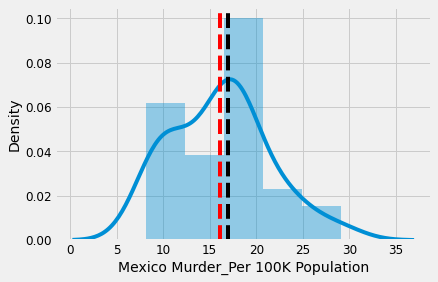

In [384]:
sns.distplot(final_murder_rate['Mexico Murder_Per 100K Population'])
plt.axvline(final_murder_rate['Mexico Murder_Per 100K Population'].mean(), color='r', linestyle='--')
plt.axvline(final_murder_rate['Mexico Murder_Per 100K Population'].median(), color='black', linestyle='--')

numpy.ndarray

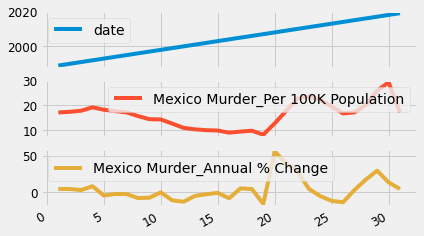

In [385]:
axes = final_murder_rate.plot.line(subplots=True)
type(axes)

### Cleaning and Feature Engineering of the df_mx_poverty dataset

In [386]:
#1989-2018
df_mx_poverty

,date,% Under US $5.50 Per Day,Change,
0,1989-12-31,39.7,NaN,NaN
1,1992-12-31,45.7,6.0,NaN
2,1994-12-31,45.3,-0.4,NaN
3,1996-12-31,61.4,16.1,NaN
4,1998-12-31,53.4,-8.0,NaN
5,2000-12-31,43.8,-9.6,NaN
6,2002-12-31,40.6,-3.2,NaN
7,2004-12-31,37.4,-3.2,NaN
8,2005-12-31,36.7,-0.7,NaN
9,2006-12-31,33.1,-3.6,NaN


In [387]:
#get exact column names 
df_mx_poverty.columns

Index(['date', ' % Under US $5.50 Per Day', ' Change', ' '], dtype='object')

In [388]:
#drop empty column
df_mx_poverty1 = df_mx_poverty[['date',' % Under US $5.50 Per Day', ' Change']]

In [389]:
df_mx_poverty1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       16 non-null     object 
 1    % Under US $5.50 Per Day  16 non-null     float64
 2    Change                    15 non-null     float64
dtypes: float64(2), object(1)
memory usage: 512.0+ bytes


In [390]:
df_mx_poverty1.describe()

,% Under US $5.50 Per Day,Change
count,16.000000,15.000000
mean,38.550000,-1.133333
std,9.869009,6.220779
min,22.700000,-9.600000
25%,33.250000,-3.400000
50%,37.050000,-1.700000
75%,44.175000,0.100000
max,61.400000,16.100000


In [391]:
#change column names to be distinguishable in master dataset
df_mx_poverty1.columns = ['date','mx_%pov_Under_US_$5.50_Per_Day', 'yearly_change_in_mx_pov_rate']

In [392]:
df_mx_poverty1['date'] = pd.to_datetime(df_mx_poverty1['date']).dt.year

In [393]:
df_mx_poverty_bonus = pd.DataFrame({'date': [1990,1991,1993,1995,1997,1999,2001,2003,2007,2009,2011,2013,2015,2017,2019],
                                     'mx_%pov_Under_US_$5.50_Per_Day': [39,39,39,39,39,39,39,39,39,39,39,39,39,39,39],
                                     'yearly_change_in_mx_pov_rate': [-1.13, -1.13, -1.13,-1.13, -1.13, -1.13,-1.13, -1.13, -1.13,-1.13, -1.13, -1.13,-1.13, -1.13, -1.13]})

In [394]:
df_mx_poverty2 = pd.concat([df_mx_poverty1, df_mx_poverty_bonus])
df_mx_poverty3 = df_mx_poverty2.set_index(keys=new_index)
df_mx_poverty3

,date,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate
1,1989,39.7,NaN
2,1992,45.7,6.00
3,1994,45.3,-0.40
4,1996,61.4,16.10
5,1998,53.4,-8.00
6,2000,43.8,-9.60
7,2002,40.6,-3.20
8,2004,37.4,-3.20
9,2005,36.7,-0.70
10,2006,33.1,-3.60


In [395]:
df_mx_poverty4 = df_mx_poverty3.sort_values("date", ascending=True)
df_mx_poverty5 = df_mx_poverty4.fillna(-1.13)
df_mx_poverty5

,date,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate
1,1989,39.7,-1.13
17,1990,39.0,-1.13
18,1991,39.0,-1.13
2,1992,45.7,6.00
19,1993,39.0,-1.13
3,1994,45.3,-0.40
20,1995,39.0,-1.13
4,1996,61.4,16.10
21,1997,39.0,-1.13
5,1998,53.4,-8.00


In [396]:
final_pov_df = df_mx_poverty5.set_index(keys=new_index)
final_pov_df

,date,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate
1,1989,39.7,-1.13
2,1990,39.0,-1.13
3,1991,39.0,-1.13
4,1992,45.7,6.00
5,1993,39.0,-1.13
6,1994,45.3,-0.40
7,1995,39.0,-1.13
8,1996,61.4,16.10
9,1997,39.0,-1.13
10,1998,53.4,-8.00


### Cleaning and Feature Engineering of the df_un dataset

In [397]:
df_un.tail()

,YEAR,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US
2,2000,9410529,34814053
3,2005,10611064,39258293
4,2010,12168662,44183643
5,2015,11643298,48178877
6,2020,10853105,50632836


In [398]:
df_un.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 3 columns):
 #   Column                                       Non-Null Count  Dtype
---  ------                                       --------------  -----
 0   YEAR                                         7 non-null      int64
 1   Number_Migrant_origin_Mexico_Destination_US  7 non-null      int64
 2   Number_Migrant_origin_World_Destination_US   7 non-null      int64
dtypes: int64(3)
memory usage: 296.0 bytes


In [399]:
#adding the interpolated data for the years missing 
df_un2 = pd.read_excel ('undesa_pd_2020_ims_stock_by_sex_destination_and_origin (1).xlsx', sheet_name= "Interpolated Data 1990-2000")

In [400]:
df_un2

,YEAR,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US
0,1990,4298014.0,23251026.0
1,1991,4804000.2,24291031.4
2,1992,5309986.4,25331036.8
3,1993,5815972.6,26371042.2
4,1994,6321958.8,27411047.6
5,1995,6827945.0,28451053.0
6,1996,7344461.8,29723653.0
7,1997,7860978.6,30996253.0
8,1998,8377495.4,32268853.0
9,1999,8894012.2,33541453.0


In [401]:
df_un2.describe()

,YEAR,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US
count,31.000000,3.100000e+01,3.100000e+01
mean,2005.000000,9.628973e+06,3.864770e+07
std,9.092121,2.388598e+06,8.700256e+06
min,1990.000000,4.298014e+06,2.325103e+07
25%,1997.500000,8.119237e+06,3.163255e+07
50%,2005.000000,1.061106e+07,3.925829e+07
75%,2012.500000,1.151544e+07,4.668066e+07
max,2020.000000,1.216866e+07,5.063284e+07


In [402]:
df_un2.columns

Index(['YEAR', 'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US'],
      dtype='object')

In [403]:
df_un3 = pd.DataFrame({'YEAR': [1989], 
                       'Number_Migrant_origin_Mexico_Destination_US': [9628973],
                       'Number_Migrant_origin_World_Destination_US': [38647700]})

In [404]:
df_un4 = df_un2.append(df_un3)

In [405]:
df_un5 = df_un4.drop(30)

In [406]:
final_un = df_un5.sort_values('YEAR').set_index(keys=new_index)
final_un

,YEAR,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US
1,1989,9628973.0,38647700.0
2,1990,4298014.0,23251026.0
3,1991,4804000.2,24291031.4
4,1992,5309986.4,25331036.8
5,1993,5815972.6,26371042.2
6,1994,6321958.8,27411047.6
7,1995,6827945.0,28451053.0
8,1996,7344461.8,29723653.0
9,1997,7860978.6,30996253.0
10,1998,8377495.4,32268853.0


### Cleaning and Feature Engineering of the df_mx_gdp dataset

In [407]:
df_mx_gdp.head()

,date,GDP Growth (%),Annual Change
0,1961,5.0000,NaN
1,1962,4.6644,-0.34
2,1963,8.1069,3.44
3,1964,11.9055,3.80
4,1965,7.1000,-4.81


In [408]:
#Since it has been decided to use years 1989-2019, we must drop the alternative rows and set the index.
df_mx_gdp.drop(df_mx_gdp.loc[0:27].index, inplace = True)
df_mx_gdp1 = df_mx_gdp.set_index(keys=new_index)
df_mx_gdp1

,date,GDP Growth (%),Annual Change
1,1989,4.1055,2.82
2,1990,5.1758,1.07
3,1991,4.2148,-0.96
4,1992,3.5411,-0.67
5,1993,1.9412,-1.60
6,1994,4.9411,3.00
7,1995,-6.2912,-11.23
8,1996,6.7733,13.06
9,1997,6.8469,0.07
10,1998,5.1639,-1.68


In [409]:
#Rename columns to be reflected accurately in preparation for the merge to the larger df.
df_mx_gdp1.columns = ['Date', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change']
df_mx_gdp1.head(5)

,Date,Mex_GDP_Growth %,Mex_Annual_GDP_Change
1,1989,4.1055,2.82
2,1990,5.1758,1.07
3,1991,4.2148,-0.96
4,1992,3.5411,-0.67
5,1993,1.9412,-1.60


### Cleaning and Feature Engineering of the df_us_gdp dataset

In [410]:
#Since there is a similar data set for US data, lets clean then merge.
df_us_gdp.drop(df_us_gdp.loc[0:27].index, inplace = True)
df_us_gdp.reset_index(drop=True)

,date,GDP Growth (%),Annual Change,
0,1989-12-31,3.6727,-0.5,NaN
1,1990-12-31,1.886,-1.79,NaN
2,1991-12-31,-0.1083,-1.99,NaN
3,1992-12-31,3.5224,3.63,NaN
4,1993-12-31,2.7528,-0.77,NaN
5,1994-12-31,4.0288,1.28,NaN
6,1995-12-31,2.6843,-1.34,NaN
7,1996-12-31,3.7725,1.09,NaN
8,1997-12-31,4.4472,0.67,NaN
9,1998-12-31,4.4814,0.03,NaN


In [411]:
#look at columns
df_us_gdp.columns

Index(['date', ' GDP Growth (%)', ' Annual Change', ' '], dtype='object')

In [412]:
#dropping unecessary columns
df_us_gdp1 = df_us_gdp[['date', ' GDP Growth (%)', ' Annual Change']]
df_us_gdp1.head(5)

,date,GDP Growth (%),Annual Change
28,1989-12-31,3.6727,-0.5
29,1990-12-31,1.886,-1.79
30,1991-12-31,-0.1083,-1.99
31,1992-12-31,3.5224,3.63
32,1993-12-31,2.7528,-0.77


In [413]:
#rename columns to prepare for merge
df_us_gdp1.columns = ['Date', 'US_GDP_Growth %', 'US_Annual_GDP_Change']
df_us_gdp1.head(5)

,Date,US_GDP_Growth %,US_Annual_GDP_Change
28,1989-12-31,3.6727,-0.5
29,1990-12-31,1.886,-1.79
30,1991-12-31,-0.1083,-1.99
31,1992-12-31,3.5224,3.63
32,1993-12-31,2.7528,-0.77


In [414]:
#drop date column, as it is unnecesary.  Reset index
df_us_gdp2 = df_us_gdp1[['US_GDP_Growth %', 'US_Annual_GDP_Change']]
df_us_gdp3 = df_us_gdp2.set_index(keys=new_index)
df_us_gdp3

,US_GDP_Growth %,US_Annual_GDP_Change
1,3.6727,-0.5
2,1.886,-1.79
3,-0.1083,-1.99
4,3.5224,3.63
5,2.7528,-0.77
6,4.0288,1.28
7,2.6843,-1.34
8,3.7725,1.09
9,4.4472,0.67
10,4.4814,0.03


### Start joining dataframes

In [415]:
#merge mx_gdp & us_gdp df
joined_data = df_mx_gdp1.merge(df_us_gdp3, how='inner', left_index=True, right_index=True)

In [416]:
#Check columns
joined_data.columns

Index(['Date', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change', 'US_GDP_Growth %',
       'US_Annual_GDP_Change'],
      dtype='object')

In [417]:
#check dataframe
joined_data

,Date,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change
1,1989,4.1055,2.82,3.6727,-0.5
2,1990,5.1758,1.07,1.886,-1.79
3,1991,4.2148,-0.96,-0.1083,-1.99
4,1992,3.5411,-0.67,3.5224,3.63
5,1993,1.9412,-1.60,2.7528,-0.77
6,1994,4.9411,3.00,4.0288,1.28
7,1995,-6.2912,-11.23,2.6843,-1.34
8,1996,6.7733,13.06,3.7725,1.09
9,1997,6.8469,0.07,4.4472,0.67
10,1998,5.1639,-1.68,4.4814,0.03


In [418]:
#Join the joined dataframe & mx_crime
joined_data1 = joined_data.merge(df_mx_crime1, how='inner', left_index=True, right_index=True)

In [419]:
#check new df
joined_data1

,Date,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75


In [420]:
#join the poverty dataset
joined_data2 = joined_data1.merge(final_pov_df, how='inner', left_index=True, right_index=True)
joined_data2

,Date,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,date,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,1989,39.7,-1.13
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,1990,39.0,-1.13
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,1991,39.0,-1.13
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,1992,45.7,6.00
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,1993,39.0,-1.13
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,1994,45.3,-0.40
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,1995,39.0,-1.13
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,1996,61.4,16.10
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,1997,39.0,-1.13
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,1998,53.4,-8.00


In [421]:
#join co2_Df
joined_data3 = joined_data2.merge(df_mex_co2_final, how='inner', left_index=True, right_index=True)
joined_data3  

,Date_x,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,date,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,Date_y,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,1989,39.7,-1.13,1989.0,361877.895,4.3934
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,1990,39.0,-1.13,1990.0,318427.612,3.7934
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,1991,39.0,-1.13,1991.0,331958.842,3.8820
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,1992,45.7,6.00,1992.0,334698.091,3.8438
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,1993,39.0,-1.13,1993.0,339468.858,3.8304
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,1994,45.3,-0.40,1994.0,352780.068,3.9130
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,1995,39.0,-1.13,1995.0,332816.920,3.6309
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,1996,61.4,16.10,1996.0,346417.823,3.7190
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,1997,39.0,-1.13,1997.0,369769.279,3.9083
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,1998,53.4,-8.00,1998.0,389087.035,4.0506


In [422]:
#clean up some columns
joined_data3.columns

Index(['Date_x', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'date', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'Date_y', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA'],
      dtype='object')

In [423]:
joined_data4 = joined_data3[['date', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA']]
joined_data4

,date,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,4.3934
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,3.7934
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,3.8820
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,3.8438
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,3.8304
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,3.9130
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,3.6309
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,3.7190
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,3.9083
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,4.0506


In [424]:
#merge inflation data
joined_data5 = joined_data4.merge(df_mex_inflation, how='inner', left_index=True, right_index=True)
joined_data5

,date,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA,DATE,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,4.3934,1989,20.0079,-94.15
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,3.7934,1990,26.6517,6.64
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,3.8820,1991,22.6624,-3.99
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,3.8438,1992,15.5079,-7.15
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,3.8304,1993,9.7515,-5.76
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,3.9130,1994,6.9658,-2.79
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,3.6309,1995,34.9993,28.03
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,3.7190,1996,34.3784,-0.62
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,3.9083,1997,20.6256,-13.75
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,4.0506,1998,15.9284,-4.70


In [425]:
#merge un data
joined_data6 = joined_data5.merge(final_un, how='inner', left_index=True, right_index=True)
joined_data6

,date,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA,DATE,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE,YEAR,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,4.3934,1989,20.0079,-94.15,1989,9628973.0,38647700.0
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,3.7934,1990,26.6517,6.64,1990,4298014.0,23251026.0
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,3.8820,1991,22.6624,-3.99,1991,4804000.2,24291031.4
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,3.8438,1992,15.5079,-7.15,1992,5309986.4,25331036.8
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,3.8304,1993,9.7515,-5.76,1993,5815972.6,26371042.2
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,3.9130,1994,6.9658,-2.79,1994,6321958.8,27411047.6
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,3.6309,1995,34.9993,28.03,1995,6827945.0,28451053.0
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,3.7190,1996,34.3784,-0.62,1996,7344461.8,29723653.0
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,3.9083,1997,20.6256,-13.75,1997,7860978.6,30996253.0
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,4.0506,1998,15.9284,-4.70,1998,8377495.4,32268853.0


In [426]:
#merge murder rate 
joined_data7 = joined_data6.merge(final_murder_rate, how='inner', left_index=True, right_index=True)
joined_data7

,date_x,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA,DATE,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE,YEAR,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,date_y,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,4.3934,1989,20.0079,-94.15,1989,9628973.0,38647700.0,1989,17.0000,4.00
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,3.7934,1990,26.6517,6.64,1990,4298014.0,23251026.0,1990,17.2653,4.00
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,3.8820,1991,22.6624,-3.99,1991,4804000.2,24291031.4,1991,17.6910,2.47
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,3.8438,1992,15.5079,-7.15,1992,5309986.4,25331036.8,1992,19.0571,7.72
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,3.8304,1993,9.7515,-5.76,1993,5815972.6,26371042.2,1993,18.0986,-5.03
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,3.9130,1994,6.9658,-2.79,1994,6321958.8,27411047.6,1994,17.5684,-2.93
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,3.6309,1995,34.9993,28.03,1995,6827945.0,28451053.0,1995,17.0319,-3.05
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,3.7190,1996,34.3784,-0.62,1996,7344461.8,29723653.0,1996,15.5722,-8.57
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,3.9083,1997,20.6256,-13.75,1997,7860978.6,30996253.0,1997,14.3239,-8.02
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,4.0506,1998,15.9284,-4.70,1998,8377495.4,32268853.0,1998,14.2167,-0.75


In [427]:
#join border spending df
joined_data8 = joined_data7.merge(final_border_spending, how='inner', left_index=True, right_index=True)
joined_data8

,date_x,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,...,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE,YEAR,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,date_y,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,Date,us_border_spending_in_millions
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,...,20.0079,-94.15,1989,9628973.0,38647700.0,1989,17.0000,4.00,1989,2000
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,...,26.6517,6.64,1990,4298014.0,23251026.0,1990,17.2653,4.00,1990,263
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,...,22.6624,-3.99,1991,4804000.2,24291031.4,1991,17.6910,2.47,1991,299
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,...,15.5079,-7.15,1992,5309986.4,25331036.8,1992,19.0571,7.72,1992,326
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,...,9.7515,-5.76,1993,5815972.6,26371042.2,1993,18.0986,-5.03,1993,363
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,...,6.9658,-2.79,1994,6321958.8,27411047.6,1994,17.5684,-2.93,1994,400
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,...,34.9993,28.03,1995,6827945.0,28451053.0,1995,17.0319,-3.05,1995,452
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,...,34.3784,-0.62,1996,7344461.8,29723653.0,1996,15.5722,-8.57,1996,568
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,...,20.6256,-13.75,1997,7860978.6,30996253.0,1997,14.3239,-8.02,1997,717
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,...,15.9284,-4.70,1998,8377495.4,32268853.0,1998,14.2167,-0.75,1998,877


In [428]:
#cleanup columns
joined_data8.columns

Index(['date_x', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA', 'DATE', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE', 'YEAR',
       'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US', 'date_y',
       'Mexico Murder_Per 100K Population', 'Mexico Murder_Annual % Change',
       'Date', 'us_border_spending_in_millions'],
      dtype='object')

In [429]:
joined_data8[['Date', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE',
       'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US',
       'Mexico Murder_Per 100K Population', 'Mexico Murder_Annual % Change',
       'us_border_spending_in_millions']]

,Date,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,MEXICO_MT_Co2_PER_CAPITA,MEXICO_INFLATION_RATE_PERCENTAGE,MEXICO_INFLATION_ANNUAL_CHANGE,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,us_border_spending_in_millions
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,4.3934,20.0079,-94.15,9628973.0,38647700.0,17.0000,4.00,2000
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,3.7934,26.6517,6.64,4298014.0,23251026.0,17.2653,4.00,263
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,3.8820,22.6624,-3.99,4804000.2,24291031.4,17.6910,2.47,299
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,3.8438,15.5079,-7.15,5309986.4,25331036.8,19.0571,7.72,326
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,3.8304,9.7515,-5.76,5815972.6,26371042.2,18.0986,-5.03,363
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,3.9130,6.9658,-2.79,6321958.8,27411047.6,17.5684,-2.93,400
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,3.6309,34.9993,28.03,6827945.0,28451053.0,17.0319,-3.05,452
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,3.7190,34.3784,-0.62,7344461.8,29723653.0,15.5722,-8.57,568
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,3.9083,20.6256,-13.75,7860978.6,30996253.0,14.3239,-8.02,717
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,4.0506,15.9284,-4.70,8377495.4,32268853.0,14.2167,-0.75,877


In [430]:
#join the greenhouse dataset
joined_data9 = joined_data8.merge(final_greenhouse_df, how='inner', left_index=True, right_index=True)
joined_data9

,date_x,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,...,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,date_y,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,Date,us_border_spending_in_millions,date,kt of CO2 equivalent,Annual % Change
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,...,9628973.0,38647700.0,1989,17.0000,4.00,1989,2000,1989.0,473325.8,2.41
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,...,4298014.0,23251026.0,1990,17.2653,4.00,1990,263,1990.0,494151.02,4.4
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,...,4804000.2,24291031.4,1991,17.6910,2.47,1991,299,1991.0,505174.028,2.23
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,...,5309986.4,25331036.8,1992,19.0571,7.72,1992,326,1992.0,494645.64,-2.08
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,...,5815972.6,26371042.2,1993,18.0986,-5.03,1993,363,1993.0,502121.057,1.51
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,...,6321958.8,27411047.6,1994,17.5684,-2.93,1994,400,1994.0,520225.772,3.61
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,...,6827945.0,28451053.0,1995,17.0319,-3.05,1995,452,1995.0,515961.212,-0.82
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,...,7344461.8,29723653.0,1996,15.5722,-8.57,1996,568,1996.0,532804.427,3.26
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,...,7860978.6,30996253.0,1997,14.3239,-8.02,1997,717,1997.0,539136.339,1.19
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,...,8377495.4,32268853.0,1998,14.2167,-0.75,1998,877,1998.0,692323.18,28.41


In [431]:
#Final Join
joined_data10 = joined_data9.merge(final_df_im_pop, how='inner', left_index=True, right_index=True)
joined_data10

,date_x,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,...,date_y,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,Date,us_border_spending_in_millions,date,kt of CO2 equivalent,Annual % Change,YEAR_y,UNAUTHORIZED_POP_ENTERED_US
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,...,1989,17.0000,4.00,1989,2000,1989.0,473325.8,2.41,1989,7.251934e+05
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,...,1990,17.2653,4.00,1990,263,1990.0,494151.02,4.4,1990,8.158760e+05
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,...,1991,17.6910,2.47,1991,299,1991.0,505174.028,2.23,1991,6.486020e+05
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,...,1992,19.0571,7.72,1992,326,1992.0,494645.64,-2.08,1992,5.586010e+05
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,...,1993,18.0986,-5.03,1993,363,1993.0,502121.057,1.51,1993,5.566050e+05
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,...,1994,17.5684,-2.93,1994,400,1994.0,520225.772,3.61,1994,7.000300e+05
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,...,1995,17.0319,-3.05,1995,452,1995.0,515961.212,-0.82,1995,8.215330e+05
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,...,1996,15.5722,-8.57,1996,568,1996.0,532804.427,3.26,1996,7.557840e+05
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,...,1997,14.3239,-8.02,1997,717,1997.0,539136.339,1.19,1997,7.587030e+05
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,...,1998,14.2167,-0.75,1998,877,1998.0,692323.18,28.41,1998,9.535910e+05


In [432]:
joined_data10.columns

Index(['date_x', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA', 'DATE', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE', 'YEAR_x',
       'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US', 'date_y',
       'Mexico Murder_Per 100K Population', 'Mexico Murder_Annual % Change',
       'Date', 'us_border_spending_in_millions', 'date',
       'kt of CO2 equivalent', 'Annual % Change', 'YEAR_y',
       'UNAUTHORIZED_POP_ENTERED_US'],
      dtype='object')

In [433]:
#Cleanup columns
df_full_mx_immigration = joined_data10[['DATE', 'Mex_GDP_Growth %', 'Mex_Annual_GDP_Change',
       'US_GDP_Growth %', 'US_Annual_GDP_Change', 'Mx_crimes_per_100k',
       'mx_annual_per_change_crimes', 'mx_%pov_Under_US_$5.50_Per_Day',
       'yearly_change_in_mx_pov_rate', 'MEXICO_TOTAL_KILOTONS_Co2',
       'MEXICO_MT_Co2_PER_CAPITA', 'MEXICO_INFLATION_RATE_PERCENTAGE',
       'MEXICO_INFLATION_ANNUAL_CHANGE',
       'Number_Migrant_origin_Mexico_Destination_US',
       'Number_Migrant_origin_World_Destination_US',
       'Mexico Murder_Per 100K Population', 'Mexico Murder_Annual % Change',
       'Date', 'us_border_spending_in_millions',
       'kt of CO2 equivalent', 'Annual % Change',
       'UNAUTHORIZED_POP_ENTERED_US']]

In [434]:
df_full_mx_immigration

,DATE,Mex_GDP_Growth %,Mex_Annual_GDP_Change,US_GDP_Growth %,US_Annual_GDP_Change,Mx_crimes_per_100k,mx_annual_per_change_crimes,mx_%pov_Under_US_$5.50_Per_Day,yearly_change_in_mx_pov_rate,MEXICO_TOTAL_KILOTONS_Co2,...,MEXICO_INFLATION_ANNUAL_CHANGE,Number_Migrant_origin_Mexico_Destination_US,Number_Migrant_origin_World_Destination_US,Mexico Murder_Per 100K Population,Mexico Murder_Annual % Change,Date,us_border_spending_in_millions,kt of CO2 equivalent,Annual % Change,UNAUTHORIZED_POP_ENTERED_US
1,1989,4.1055,2.82,3.6727,-0.5,16.0000,3.00,39.7,-1.13,361877.895,...,-94.15,9628973.0,38647700.0,17.0000,4.00,1989,2000,473325.8,2.41,7.251934e+05
2,1990,5.1758,1.07,1.886,-1.79,17.2653,3.00,39.0,-1.13,318427.612,...,6.64,4298014.0,23251026.0,17.2653,4.00,1990,263,494151.02,4.4,8.158760e+05
3,1991,4.2148,-0.96,-0.1083,-1.99,17.6910,2.47,39.0,-1.13,331958.842,...,-3.99,4804000.2,24291031.4,17.6910,2.47,1991,299,505174.028,2.23,6.486020e+05
4,1992,3.5411,-0.67,3.5224,3.63,19.0571,7.72,45.7,6.00,334698.091,...,-7.15,5309986.4,25331036.8,19.0571,7.72,1992,326,494645.64,-2.08,5.586010e+05
5,1993,1.9412,-1.60,2.7528,-0.77,18.0986,-5.03,39.0,-1.13,339468.858,...,-5.76,5815972.6,26371042.2,18.0986,-5.03,1993,363,502121.057,1.51,5.566050e+05
6,1994,4.9411,3.00,4.0288,1.28,17.5684,-2.93,45.3,-0.40,352780.068,...,-2.79,6321958.8,27411047.6,17.5684,-2.93,1994,400,520225.772,3.61,7.000300e+05
7,1995,-6.2912,-11.23,2.6843,-1.34,17.0319,-3.05,39.0,-1.13,332816.920,...,28.03,6827945.0,28451053.0,17.0319,-3.05,1995,452,515961.212,-0.82,8.215330e+05
8,1996,6.7733,13.06,3.7725,1.09,15.5722,-8.57,61.4,16.10,346417.823,...,-0.62,7344461.8,29723653.0,15.5722,-8.57,1996,568,532804.427,3.26,7.557840e+05
9,1997,6.8469,0.07,4.4472,0.67,14.3239,-8.02,39.0,-1.13,369769.279,...,-13.75,7860978.6,30996253.0,14.3239,-8.02,1997,717,539136.339,1.19,7.587030e+05
10,1998,5.1639,-1.68,4.4814,0.03,14.2167,-0.75,53.4,-8.00,389087.035,...,-4.70,8377495.4,32268853.0,14.2167,-0.75,1998,877,692323.18,28.41,9.535910e+05


In [435]:
#export to csv file
df_full_mx_immigration.to_csv('df_full_mx_immigration.csv')